### LSTM을 사용한 언어 모델

In [8]:
import sys
sys.path.append('..')
from common.time_layers import *
from common.base_model import BaseModel


class Rnnlm(BaseModel):
    def __init__(self, vocab_size=10000, wordvec_size=100, hidden_size=100):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs):
        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts):
        score = self.predict(xs)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.lstm_layer.reset_state()


### 학습을 위한 코드

Done
| 에폭 1 |  반복 1 / 1327 | 시간 0[s] | 퍼플렉서티 9999.69
| 에폭 1 |  반복 21 / 1327 | 시간 8[s] | 퍼플렉서티 2965.95
| 에폭 1 |  반복 41 / 1327 | 시간 17[s] | 퍼플렉서티 1249.66
| 에폭 1 |  반복 61 / 1327 | 시간 25[s] | 퍼플렉서티 962.55
| 에폭 1 |  반복 81 / 1327 | 시간 34[s] | 퍼플렉서티 796.55
| 에폭 1 |  반복 101 / 1327 | 시간 42[s] | 퍼플렉서티 661.68
| 에폭 1 |  반복 121 / 1327 | 시간 51[s] | 퍼플렉서티 651.81
| 에폭 1 |  반복 141 / 1327 | 시간 59[s] | 퍼플렉서티 589.56
| 에폭 1 |  반복 161 / 1327 | 시간 68[s] | 퍼플렉서티 585.20
| 에폭 1 |  반복 181 / 1327 | 시간 76[s] | 퍼플렉서티 579.40
| 에폭 1 |  반복 201 / 1327 | 시간 85[s] | 퍼플렉서티 508.90
| 에폭 1 |  반복 221 / 1327 | 시간 94[s] | 퍼플렉서티 498.41
| 에폭 1 |  반복 241 / 1327 | 시간 102[s] | 퍼플렉서티 444.40
| 에폭 1 |  반복 261 / 1327 | 시간 111[s] | 퍼플렉서티 482.82
| 에폭 1 |  반복 281 / 1327 | 시간 121[s] | 퍼플렉서티 450.57
| 에폭 1 |  반복 301 / 1327 | 시간 131[s] | 퍼플렉서티 396.99
| 에폭 1 |  반복 321 / 1327 | 시간 140[s] | 퍼플렉서티 344.93
| 에폭 1 |  반복 341 / 1327 | 시간 149[s] | 퍼플렉서티 412.85
| 에폭 1 |  반복 361 / 1327 | 시간 158[s] | 퍼플렉서티 409.24
| 에폭 1 |  반복 381 / 1327 | 시간 167[s] | 퍼플렉서티

| 에폭 3 |  반복 501 / 1327 | 시간 1401[s] | 퍼플렉서티 127.98
| 에폭 3 |  반복 521 / 1327 | 시간 1411[s] | 퍼플렉서티 137.84
| 에폭 3 |  반복 541 / 1327 | 시간 1422[s] | 퍼플렉서티 135.94
| 에폭 3 |  반복 561 / 1327 | 시간 1433[s] | 퍼플렉서티 118.87
| 에폭 3 |  반복 581 / 1327 | 시간 1444[s] | 퍼플렉서티 104.46
| 에폭 3 |  반복 601 / 1327 | 시간 1454[s] | 퍼플렉서티 147.07
| 에폭 3 |  반복 621 / 1327 | 시간 1464[s] | 퍼플렉서티 142.52
| 에폭 3 |  반복 641 / 1327 | 시간 1474[s] | 퍼플렉서티 129.56
| 에폭 3 |  반복 661 / 1327 | 시간 1483[s] | 퍼플렉서티 120.33
| 에폭 3 |  반복 681 / 1327 | 시간 1492[s] | 퍼플렉서티 100.43
| 에폭 3 |  반복 701 / 1327 | 시간 1500[s] | 퍼플렉서티 118.24
| 에폭 3 |  반복 721 / 1327 | 시간 1509[s] | 퍼플렉서티 126.13
| 에폭 3 |  반복 741 / 1327 | 시간 1517[s] | 퍼플렉서티 107.06
| 에폭 3 |  반복 761 / 1327 | 시간 1526[s] | 퍼플렉서티 103.88
| 에폭 3 |  반복 781 / 1327 | 시간 1534[s] | 퍼플렉서티 104.45
| 에폭 3 |  반복 801 / 1327 | 시간 1543[s] | 퍼플렉서티 115.37
| 에폭 3 |  반복 821 / 1327 | 시간 1551[s] | 퍼플렉서티 116.07
| 에폭 3 |  반복 841 / 1327 | 시간 1560[s] | 퍼플렉서티 115.04
| 에폭 3 |  반복 861 / 1327 | 시간 1569[s] | 퍼플렉서티 117.49
| 에폭 3 |  반복

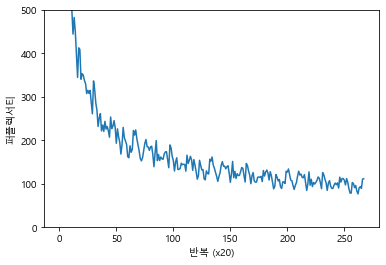

퍼플렉서티 평가 중 ...
234 / 235
테스트 퍼플렉서티:  136.39106711546


In [9]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from rnnlm import Rnnlm


# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 35     # RNN을 펼치는 크기
lr = 20.0
max_epoch = 4
max_grad = 0.25

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

# 모델 생성
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

# 기울기 클리핑을 적용하여 학습
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad,
            eval_interval=20)
trainer.plot(ylim=(0, 500))

# 테스트 데이터로 평가
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)

# 매개변수 저장
model.save_params()